# Problem 2. Finding Neptune before seeing it.

https://en.wikipedia.org/wiki/Discovery_of_Neptune

The planet Neptune was mathematically predicted before it was directly observed. With a prediction by Urbain Le Verrier, telescopic observations confirming the existence of a major planet were made on the night of September 23–24, 1846, at the Berlin Observatory, by astronomer Johann Gottfried Galle (assisted by Heinrich Louis d'Arrest), working from Le Verrier's calculations. It was a sensational moment of 19th-century science, and dramatic confirmation of Newtonian gravitational theory. In François Arago's apt phrase, Le Verrier had discovered a planet "with the point of his pen".

In this home Problem, we are letting you to discover Neptune in a Sun-Uranus-Neptune system using `jax`. We will start with a single-planet practice



In [7]:
import numpy as onp
import jax.numpy as np
from jax.experimental.ode import build_odeint, odeint
from jax import grad
from jax import jit
import matplotlib.pyplot as plt
import numpy as onp

## (a) Consider a two-body Uranus-Sun system. Suppose the Uranus' orbital around sun has a farthest point with $d_{US} = 0.25$. At this point, the Uranus travels at $v_U = 4$. Load the data from `orbit_data_2B.txt` and use `jax` to find out what is the mass of the Sun $m_S$.

The time period within which the data is simulated is between $0$ and $0.4$.
The recommended initial guess of the mass is somewhere from $0$ to $10$.

In [2]:
d_US = 0.25

The two-body Newton's equation of motion written in an `odeint` compatible form

In [3]:
# What is the coord part of this input? It worked with the real orbit_data. Also what is the output? With the 
# real orbit_data it output a 4x4 array
def newton_2(coord, t, m_S):
    x = coord[:2]
    y = coord[2:4]
    r = np.sqrt(x[0]**2+y[0]**2)
    ax = -(x[0]/r)*m_S/r**2
    ay = -(y[0]/r)*m_S/r**2
    return np.array([x[1], ax, y[1], ay])

Load the two-body data. The data is in the format of $(x, v_x, y, v_y)$ where $v$ is the velocity.

In [4]:
orbit_data = onp.loadtxt('./orbit_data_2B.txt')

In [10]:
# Look at the data
print(orbit_data.shape)

(100, 4)


This is how the orbit looks like

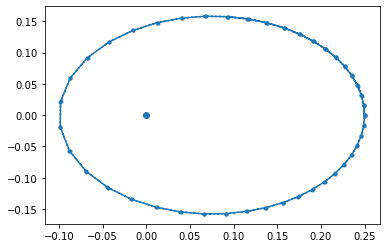

In [5]:
plt.plot(orbit_data[:,0],orbit_data[:,2],'.--')
plt.scatter([0],[0])

### Solution to (a)

In [12]:
# Solution here
newton_2_odeint = build_odeint(newton_2)

real_orbit = orbit_data
m_S_est = np.array([5.0])
t = onp.linspace(0,0.4,100)

/home/zack/anaconda3/envs/am216/lib/python3.7/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [ ]:
def loss(est_orbit, m_S_est):
    loss = np.sum((newton_2_odeint(est_orbit, t, a).reshape(-1)-traj_true.reshape(-1))**2)

In [18]:
m_S_est.shape

(1,)

In [23]:
print(newton_2(np.array(1,1,1,1), t, m_S_est))

NotImplementedError: Only implemented for order='K'

## (b) Now we consider the three body system including the Sun, Uranus and Neptune. You will be given

*   A short trajectory of Uranus `orbit_data_3B.txt`. The time period within which the data is simulated is between $0$ and $0.05$.
*   Mass $m_U$. Distance from the Uranus to the Sun at the starting point $r_{U}$.

and you will predict
*   The mass of Neptune $m_N$
*   The distance from Neptune to the Sun at the starting point $r_{N}$

More configuration of the sustem:
*   The Sun is fixed at $(0,0)$
*   The starting positions of the Uranus and the Neptune are $(r_U, 0)$ and $(r_N, 0)$.
*   Uranus and Neptune are put quite close to each other in order for the influence between Uranus and Neptune to show up quickly.
*   In this question, the velocities are set to $\sqrt{M/r_0}$, which is the velocity of a circular orbital when feeling only the gravity from the sun. You can find it in the following code but you do not need to do any modification.

**Report your findings to Kaggle!**

The recommended initial guess of the mass is somewhere from $5$ to $15$.
The recommended initial guess of the orbit radius is somewhere from $2$ to $5$.

In [ ]:
m_U = 8.681 
m_S = 7*10**4 
r_U = 1.784 

The two-body Newton's equation of motion written in an `odeint` compatible form

In [ ]:
def grav(m1,m2,r):
    return m1*m2/r**2
def newton_3(coord,t, m_N, r_N):
    x_U = coord[:2] # x is actually x and dx/dt
    y_U = coord[2:4]
    x_N = coord[4:6]
    y_N = coord[6:8]
    r_U = np.sqrt(x_U[0]**2+y_U[0]**2)
    r_N = np.sqrt(x_N[0]**2+y_N[0]**2)
    x_UN = x_N - x_U
    y_UN = y_N - y_U    
    r_UN = np.sqrt((x_UN[0])**2+(y_UN[0])**2)
    
    fx_U = -(x_U[0]/r_U)*grav(m_U, m_S, r_U) + (x_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    fy_U = -(y_U[0]/r_U)*grav(m_U, m_S, r_U) + (y_UN[0]/r_UN)*grav(m_U, m_N, r_UN)    
    fx_N = -(x_N[0]/r_N)*grav(m_N, m_S, r_N) - (x_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    fy_N = -(y_N[0]/r_N)*grav(m_N, m_S, r_N) - (y_UN[0]/r_UN)*grav(m_U, m_N, r_UN)
    return np.array([x_U[1], fx_U/m_U, y_U[1], fy_U/m_U, x_N[1], fx_N/m_N, y_N[1], fy_N/m_N])
def circle_v(m_center, r0):
  # get the velocity that makes a planet's orbit a sphere. 
  # It should be a save velocity for us to use to make legitimate simulation.
    return  np.sqrt(m_center/r0)

The orbit data is in the format of $(x, v_x, y, v_y)$ where $v$ stands for the velocity of Uranus.

In [2]:
import numpy as onp

In [9]:
orbit_data = onp.loadtxt('./orbit_data_3B.txt')

See that the orbit is not closed? Because it is pulled by the Neptune.
Now go get Neptune!

In [ ]:
plt.plot(orbit_data[:,0],orbit_data[:,2],'.--')
plt.scatter([0],[0])

### Solution to (b)

In [ ]:
# Solution here

Report your findings to kaggle!